In [1]:
import sys
import ast
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("..")

from tools.numeric_utils import cubic_integration
from tools.reader import get_dh_dl, get_data

from utils_automated import g_lambda_i,  get_partial_uncertanty, get_rmsd
                                                           

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


# Self-solvation free energy of hexane

[0.0, 0.04, 0.09, 0.13, 0.17, 0.22, 0.31, 0.44, 0.66, 1.0]
[  6.74  16.29  24.02  19.79  11.81   3.54  -3.4   -7.91 -11.63 -16.  ]
[0.177 0.476 1.162 1.006 0.809 0.322 0.069 0.018 0.011 0.02 ]


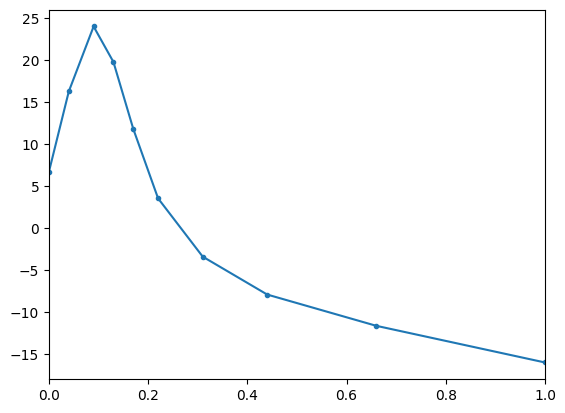


Integration results: -4.289 ± 0.102

Partial uncertanties
 [0.01910765929353055, 0.038037047541203566, 0.03294663708817223, 0.030300724019989546, 0.032212094841730425, 0.042517149010178584, 0.03161478532872442, 0.033181848460251, 0.041126786980797]

Optimal uncertanty in each lambda step: 0.033

Relative RMSD to optimal value: 19.50%

Reference:  -4.500 ± 0.026--> Relative deviation: 4.70 %


 ############################################################ 


Integration results: -4.525 ± 0.052

Partial uncertanties
 [0.008069560832347127, 0.018809705097394252, 0.01871761901066519, 0.01647000075315576, 0.013899503022755008, 0.019438405748719738, 0.015586650217136844, 0.016791814417421874, 0.023162938482605273]

Optimal uncertanty in each lambda step: 0.017

Relative RMSD to optimal value: 23.63%

Reference:  -4.500 ± 0.026--> Relative deviation: 0.55 %



In [15]:
## Read in optimized simulation results

folder = "lammps/hexane_hexane"

with open(f"{folder}/adapted/opt_intermediates.log") as f:
    lines = [line for line in f]
    
idx     = [i for i,line in enumerate(lines) if "The optimized intermediates are:" in line][0]
lambdas = ast.literal_eval(lines[idx+1].split("\n")[0])

idx     = [i for i,line in enumerate(lines) if "The job folders indices are:" in line][0]
indices = ast.literal_eval(lines[idx+1].split("\n")[0])
    
test      = f"{folder}/adapted/sim_vdw_%d/fep.sampling"
paths     = [test%i for i in indices]
mean, var = get_dh_dl( fe_data = [get_data(paths)], no_intermediates = len(lambdas), delta = 0.001 , both_ways = False)

print(lambdas)
print(np.round(mean,2))
print(np.round(var,3))

plt.plot(lambdas,mean,marker=".")
plt.xlim(0,1)
plt.show()
plt.close()

tmp = cubic_integration(lambdas,mean,var) 
print("\nIntegration results: %.3f ± %.3f"%(tmp[0],tmp[1])) 

dG_i = get_partial_uncertanty(lambdas,var)

print("\nPartial uncertanties\n", dG_i )

rmsd = get_rmsd(dG_i,verbose=True)

gridpoint = g_lambda_i(dG_i)

# plt.plot(lambdas, gridpoint/np.max(gridpoint) )
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.show()
# plt.close()

lambdas   = np.round( np.concatenate( (np.linspace(0,0.2,60), np.linspace(0.22,1.0,21)) ), 3 )
test      = f"{folder}/reference_sim/sim_%d/fep%d%d.sampling"
paths     = [test%(i,i,i+1) for i in range(len(lambdas))]
mean, var = get_dh_dl( fe_data = [get_data(paths)], no_intermediates = len(lambdas), delta = 0.0001 , both_ways = False)
ref = cubic_integration(lambdas,mean,var)

print("Reference:  %.3f ± %.3f--> Relative deviation: %.2f %%\n"%(ref[0],ref[1],np.abs((tmp[0]-ref[0])/ref[0])*100))

###################################

print("\n","###"*20,"\nLong simulation with optimized lambdas\n")

# simulation from simulations system pure hexane

lambdas = [0.0, 0.04, 0.09, 0.13, 0.17, 0.22, 0.31, 0.44, 0.66, 1.0]
mean = [  6.62881314,  17.04052171,  21.96416744,  18.82260583, 9.30141817,   2.92627164,  -3.86374074,  -8.03216474, -11.40968689, -16.018946  ]
var = [0.03587521, 0.08029126, 0.31115903, 0.38513207, 0.13842059, 0.0661821 , 0.01890864, 0.00456569, 0.00410826, 0.00643991]

tmp = cubic_integration(lambdas,mean,var) 
print("\nIntegration results: %.3f ± %.3f"%(tmp[0],tmp[1])) 

dG_i = get_partial_uncertanty(lambdas,var)

print("\nPartial uncertanties\n", dG_i )

rmsd = get_rmsd(dG_i,verbose=True)

print("Reference:  %.3f ± %.3f--> Relative deviation: %.2f %%\n"%(ref[0],ref[1],np.abs((tmp[0]-ref[0])/ref[0])*100))

# Self-solvation free energy of butylamine

[0.0, 0.05, 0.09, 0.12, 0.15, 0.18, 0.23, 0.29, 0.36, 0.47, 0.6, 0.78, 1.0]
[  4.84  16.89  22.75  22.47  16.06  10.03   3.69  -1.37  -5.01  -7.68
 -10.25 -12.63 -15.14]
[0.139 0.26  1.308 1.4   1.292 0.555 0.216 0.084 0.037 0.021 0.011 0.012
 0.009]


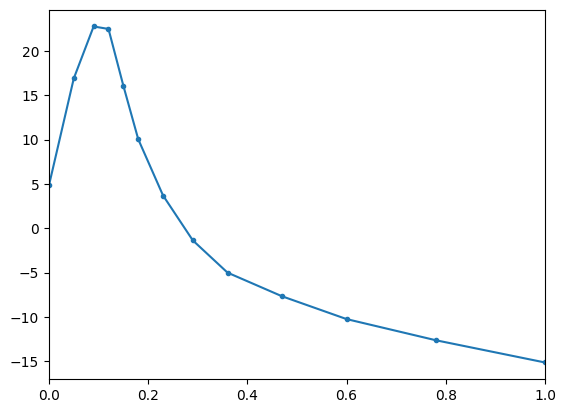


Integration results: -3.830 ± 0.079

Partial uncertanties
 [0.022001532734680838, 0.031293580507557296, 0.027647121558157385, 0.027907720482657855, 0.023342875884132384, 0.02964389602489414, 0.020928281985528863, 0.015141247524905534, 0.017624147145198315, 0.014197154152169007, 0.01646477999101093, 0.019570372492205716]

Optimal uncertanty in each lambda step: 0.022

Relative RMSD to optimal value: 25.34%

Reference:  -3.789 ± 0.028--> Relative deviation: 1.10 %


 ############################################################ Long simulation with optimized lambdas


Integration results: -3.760 ± 0.041

Partial uncertanties
 [0.012630747216837945, 0.014861633210968802, 0.014132916363914122, 0.01423541404312297, 0.010944502901513003, 0.014913102632307917, 0.011447775366835194, 0.008952183585098875, 0.01033465783078937, 0.008010097949147888, 0.008517578602091362, 0.00962028696456453]

Optimal uncertanty in each lambda step: 0.012

Relative RMSD to optimal value: 21.12%

Reference:  -3.789

In [16]:
## Read in optimized simulation results

folder = "lammps/butylamine_butylamine"

with open(f"{folder}/adapted/opt_intermediates.log") as f:
    lines = [line for line in f]
    
idx     = [i for i,line in enumerate(lines) if "The optimized intermediates are:" in line][0]
lambdas = ast.literal_eval(lines[idx+1].split("\n")[0])

idx     = [i for i,line in enumerate(lines) if "The job folders indices are:" in line][0]
indices = ast.literal_eval(lines[idx+1].split("\n")[0])
    
test      = f"{folder}/adapted/sim_vdw_%d/fep.sampling"
paths     = [test%i for i in indices]
mean, var = get_dh_dl( fe_data = [get_data(paths)], no_intermediates = len(lambdas), delta = 0.0001 , both_ways = False)

print(lambdas)
print(np.round(mean,2))
print(np.round(var,3))

plt.plot(lambdas,mean,marker=".")
plt.xlim(0,1)
plt.show()
plt.close()

tmp = cubic_integration(lambdas,mean,var) 
print("\nIntegration results: %.3f ± %.3f"%(tmp[0],tmp[1])) 

dG_i = get_partial_uncertanty(lambdas,var)

print("\nPartial uncertanties\n", dG_i )

rmsd = get_rmsd(dG_i,verbose=True)

gridpoint = g_lambda_i(dG_i)

# plt.plot(lambdas, gridpoint/np.max(gridpoint) )
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.show()
# plt.close()

lambdas   = np.round( np.concatenate( (np.linspace(0,0.2,60), np.linspace(0.22,1.0,21)) ), 3 )
test      = f"{folder}/reference_sim/sim_%d/fep%d%d.sampling"
paths     = [test%(i,i,i+1) for i in range(len(lambdas))]
mean, var = get_dh_dl( fe_data = [get_data(paths)], no_intermediates = len(lambdas), delta = 0.0001 , both_ways = False)
ref = cubic_integration(lambdas,mean,var)

print("Reference:  %.3f ± %.3f--> Relative deviation: %.2f %%\n"%(ref[0],ref[1],np.abs((tmp[0]-ref[0])/ref[0])*100))

###################################

print("\n","###"*20,"\nLong simulation with optimized lambdas\n")

# simulation from simulations system pure hexane

lambdas = [0.0, 0.05, 0.09, 0.12, 0.15, 0.18, 0.23, 0.29, 0.36, 0.47, 0.6, 0.78, 1.0]
mean = [  4.6494437 ,  16.97608878,  24.02697776,  22.32830482,
         16.96984858,   9.91305177,   3.35497587,  -1.2931199 ,
         -4.57079453,  -7.75868135, -10.21354935, -12.55110502,
        -15.42613467]
var = [0.03903956, 0.09829039, 0.26331572, 0.43289871, 0.26827552,
        0.13907643, 0.06333814, 0.03042486, 0.01315908, 0.00651849,
        0.00337257, 0.00238595, 0.00346365]

tmp = cubic_integration(lambdas,mean,var) 
print("\nIntegration results: %.3f ± %.3f"%(tmp[0],tmp[1])) 

dG_i = get_partial_uncertanty(lambdas,var)

print("\nPartial uncertanties\n", dG_i )

rmsd = get_rmsd(dG_i,verbose=True)

print("Reference:  %.3f ± %.3f--> Relative deviation: %.2f %%\n"%(ref[0],ref[1],np.abs((tmp[0]-ref[0])/ref[0])*100))